# Import necessary packages

In [232]:
import numpy as np
import pandas as pd
import scipy
import pingouin as pg 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from scipy.stats import chi2_contingency, fisher_exact
import warnings

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.5f}'.format

In [406]:
pg.__version__

'0.5.5'

In [2]:
warnings.filterwarnings("ignore")

# Read the dataset

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2018,1,0,1,0,6,0,2,14.11085,18.18125,80.58330,10.74988,331,654,985
1,2,2/1/2018,1,0,1,0,0,0,2,14.90260,17.68695,69.60870,16.65211,131,670,801
2,3,3/1/2018,1,0,1,0,1,1,1,8.05092,9.47025,43.72730,16.63670,120,1229,1349
3,4,4/1/2018,1,0,1,0,2,1,1,8.20000,10.60610,59.04350,10.73983,108,1454,1562
4,5,5/1/2018,1,0,1,0,3,1,1,9.30524,11.46350,43.69570,12.52230,82,1518,1600


In [5]:
df.shape

(730, 16)

# Check for null values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Inference: Their are no null values in any column

# Data Cleansing

## Removing Irrelevant Columns

In [7]:
df.drop(['instant', 'dteday', 'atemp', 'casual', 'registered'], axis=1, inplace=True)

In [8]:
df.shape

(730, 11)

# Segregrating the remaining features into continuous and categorical/numeric discrete type

In [11]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.11085,80.58330,10.74988,985
1,1,0,1,0,0,0,2,14.90260,69.60870,16.65211,801
2,1,0,1,0,1,1,1,8.05092,43.72730,16.63670,1349
3,1,0,1,0,2,1,1,8.20000,59.04350,10.73983,1562
4,1,0,1,0,3,1,1,9.30524,43.69570,12.52230,1600


In [12]:
continuous = ['temp', 'hum', 'windspeed']

categorical = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

target = 'cnt'

len(continuous),len(categorical)

(3, 7)

# EDA

## Univariate and Bivariate Analysis

## Continuous Variables

In [13]:
def distribution_plot(col, figsize):
    
    print(df[col].describe())
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=figsize)

    sns.histplot(df[col], ax=ax[0])
    ax[0].set_title(f"Histogram of {col} \n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})

    sns.boxplot(data= df, y=col ,ax=ax[1])
    ax[1].set_title(f"Boxplot of {col}\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'});
    return None

In [14]:
def plot_cont_with_target(col, col_desc, figsize):
    plt.figure(figsize=figsize)
    sns.regplot(x=col, y='cnt', data=df)
    plt.title(f'Regression Plot of {col_desc} with bicycle count')
    plt.show();

### Bicycle Count

count    730.00000
mean    4508.00685
std     1936.01165
min       22.00000
25%     3169.75000
50%     4548.50000
75%     5966.00000
max     8714.00000
Name: cnt, dtype: float64


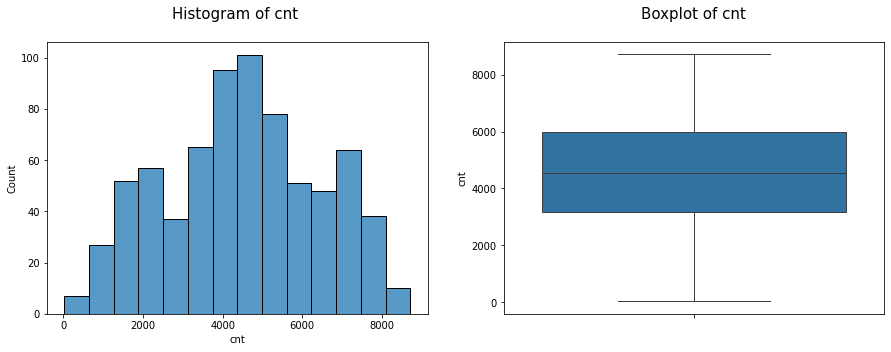

In [15]:
distribution_plot(col='cnt',figsize= (15,5))

#### Inference:
            1) The minimum and maximum value of bicycle count is 22 and 8714.
            2) The mean value of bicycle count is 4508
            3) Their are no outliers in bicycle count variable

### Temperature in Celsius (temp)


count   730.00000
mean     20.31926
std       7.50673
min       2.42435
25%      13.81189
50%      20.46583
75%      26.88061
max      35.32835
Name: temp, dtype: float64


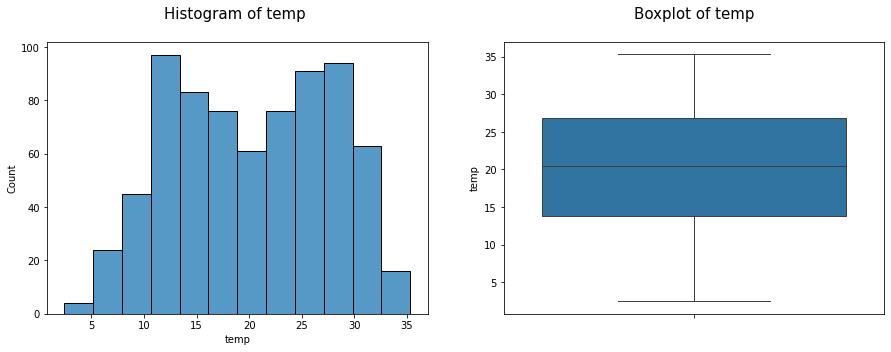

In [16]:
distribution_plot(col='temp',figsize= (15,5))

#### Inference:
            1) The minimum and maximum value of temperature is 2.42 and 35.3.
            2) The mean value of temperature is 20.32
            3) Their are no outliers in temperature

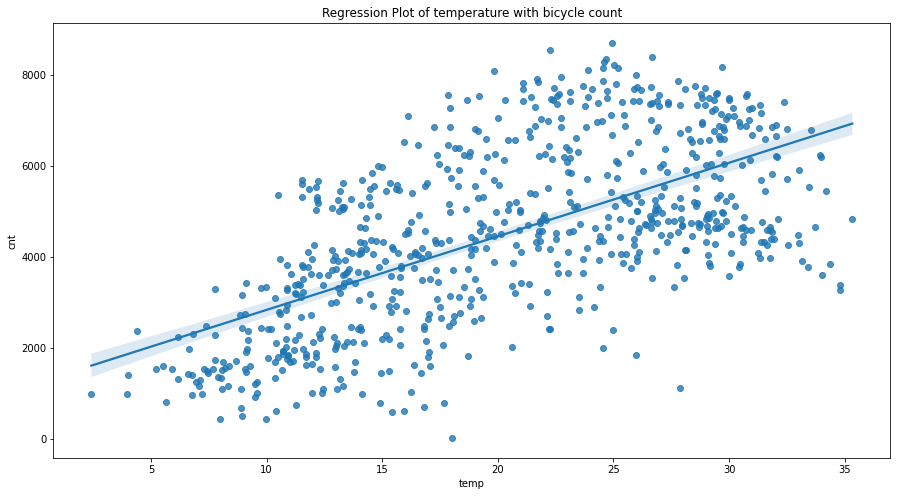

In [17]:
plot_cont_with_target(col='temp', col_desc='temperature', figsize=(15,8))

#### Inference:
             1) In general, with increasing temperture the demand for bicycles increases
             2) Their is a weak linear correlation(~63%) of temperture with bicycle count

### Humidity

count   730.00000
mean     62.76517
std      14.23759
min       0.00000
25%      52.00000
50%      62.62500
75%      72.98958
max      97.25000
Name: hum, dtype: float64


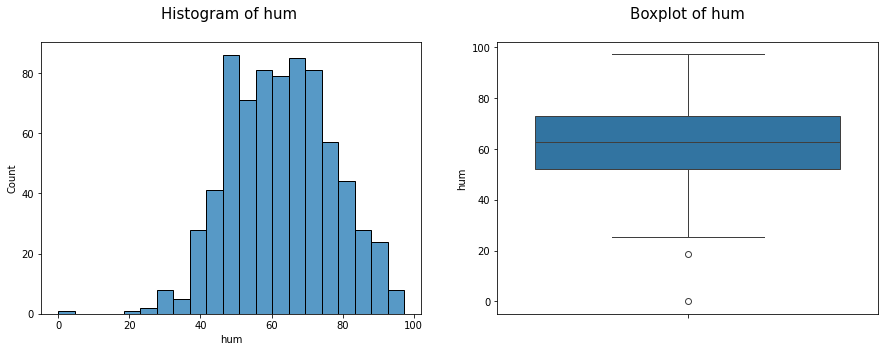

In [18]:
distribution_plot(col='hum',figsize= (15,5))

#### Inference:
            1) The minimum and maximum value of humidity is 0 and 97.25.
            2) The mean value of temperature is 62.76
            3) Their are very few outliers in below lower whiskers of humidity as shown in the boxplot
            4) Since these are very few in number, so they will imputed by the median

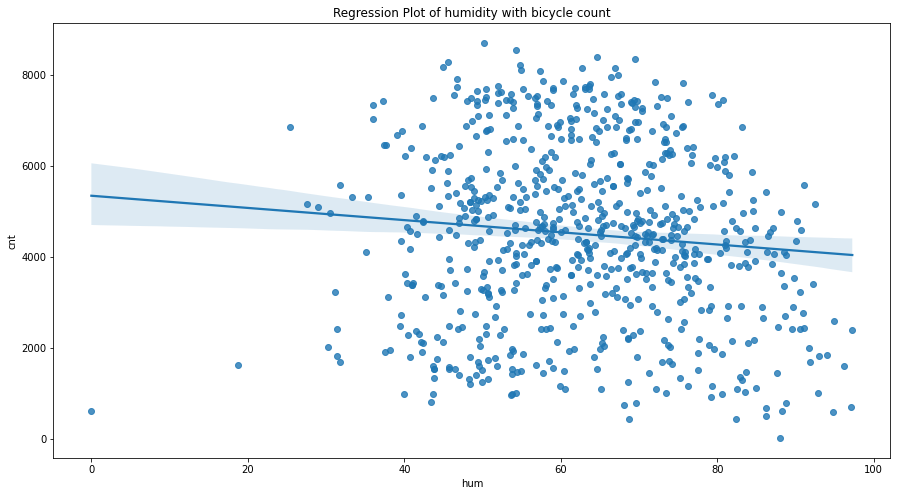

In [19]:
plot_cont_with_target(col='hum', col_desc='humidity', figsize=(15,8))

#### Inference:
            1) Their is almost no bicycle demand below humidity value of 30
            2) Their is very very weak negative correlation(~10%) of humidity with bicycle count 

#### Outlier removal

In [20]:
hum_25 , hum_75 = np.percentile(df['hum'], 25), np.percentile(df['hum'], 75)
hum_iqr = hum_75 - hum_25
hum_25 , hum_75, hum_iqr

(52.0, 72.989575, 20.989575000000002)

In [21]:
hum_lower_outlier_limit = hum_25 - 1.5*hum_iqr
hum_lower_outlier_limit

20.515637499999997

In [22]:
df['hum'] = np.where(df['hum']<hum_lower_outlier_limit, hum_lower_outlier_limit, df['hum'])

### Windspeed

count   730.00000
mean     12.76362
std       5.19584
min       1.50024
25%       9.04165
50%      12.12533
75%      15.62559
max      34.00002
Name: windspeed, dtype: float64


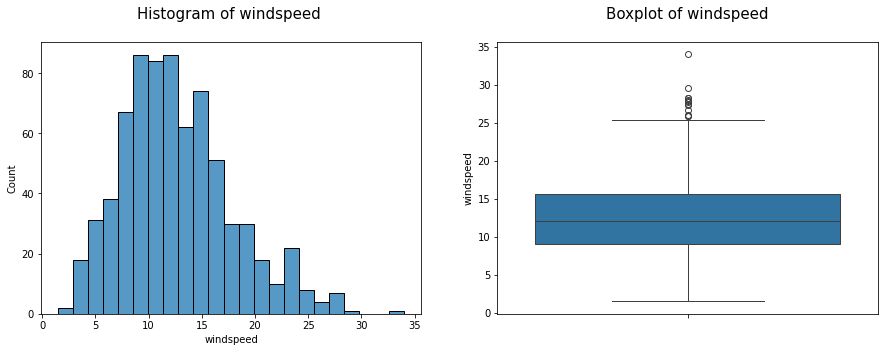

In [23]:
distribution_plot(col='windspeed',figsize= (15,5))

#### Inference:
            1) The minimum and maximum value of windspeed is 1.5 and 34.
            2) The mean value of windspeed is 12.76
            3) Their are outliers in windspeed after a value of around 26 as shown in boxplot 
               which will be removed by upper capping using the interquartile range method 

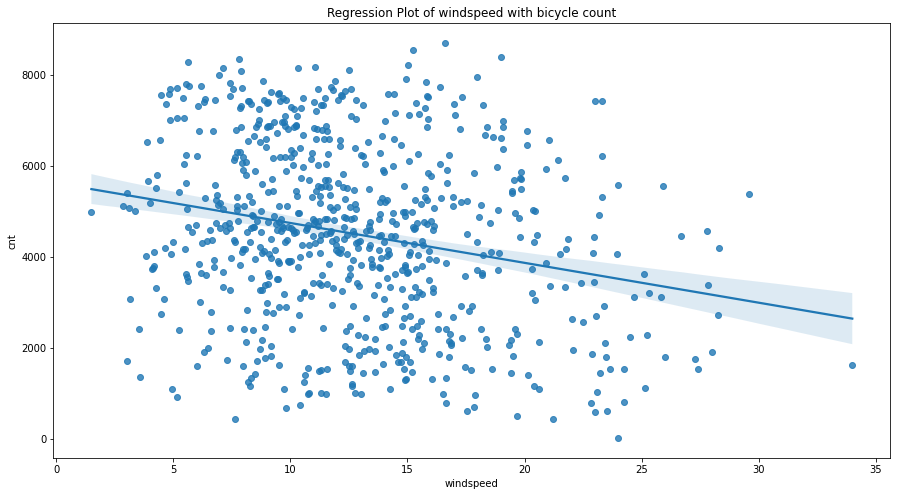

In [24]:
plot_cont_with_target(col='windspeed', col_desc='windspeed', figsize=(15,8))

#### Inference:
            1) Their is very weak negative correlation(~23%) of windspeed with bicycle count 

#### Outlier removal

In [25]:
windspeed_25 , windspeed_75 = np.percentile(df['windspeed'], 25), np.percentile(df['windspeed'], 75)
windspeed_iqr = windspeed_75 - windspeed_25
windspeed_25 , windspeed_75, windspeed_iqr

(9.04165, 15.62558925, 6.58393925)

In [26]:
windspeed_upper_outlier_limit = windspeed_75 + 1.5*windspeed_iqr
windspeed_upper_outlier_limit

25.501498125

In [27]:
df['windspeed'] = np.where(df['windspeed']>windspeed_upper_outlier_limit, windspeed_upper_outlier_limit, df['windspeed'])

### Correlation Analysis

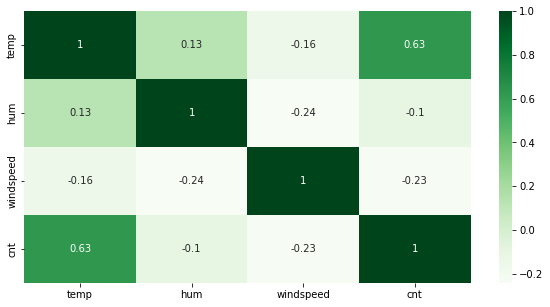

In [28]:
plt.figure(figsize=(10,5))
sns.heatmap(df[continuous+[target]].corr(), annot=True, cmap='Greens')
plt.show()

#### Inference:
              1) None of the independent continuous variables have a very strong correlation with each other
              2) None of the continuous variables have a very strong correlation with bicycle count
              3) Temperature has a correlation of ~63% whereas humidity and windspeed have a very weak negative 
                 correlation of 10% and 23% respectively with bicycle count

## Categorical Variables

In [29]:
def plot_countplot(col, col_desc, xticks, figsize):
    fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=figsize)

    print(df[col].value_counts() ,'\n\n',df[col].value_counts(normalize=True)*100)
    
    sns.countplot(data=df, x=col,ax=ax[0])
    ax[0].set_title(f"Count of {col_desc} Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
    if xticks:
        ax[0].set_xticks(xticks[0], xticks[1], rotation=xticks[2])

    sns.barplot(x= df[col].value_counts().index, y=(df[col].value_counts(normalize=True)*100).values,ax=ax[1])
    ax[1].set_title(f"Percentage of {col_desc} Categories\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
    if xticks:
        ax[1].set_xticks(xticks[0], xticks[1], rotation=xticks[2]);
    
    return fig,ax 

In [30]:
def plot_cat_with_target(col, col_desc, xticks, figsize):
    print(df.groupby(col).agg({'cnt':['sum', 'median']}))
    plt.figure(figsize=figsize)
    sns.boxplot(x=col, y='cnt', data=df)
    plt.title(f'Box Plot of {col_desc} with bicycle count')
    if xticks:
        plt.xticks(xticks[0], xticks[1], rotation=xticks[2])
    plt.show();

### Season

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 

 season
3   25.75342
2   25.20548
1   24.65753
4   24.38356
Name: proportion, dtype: float64


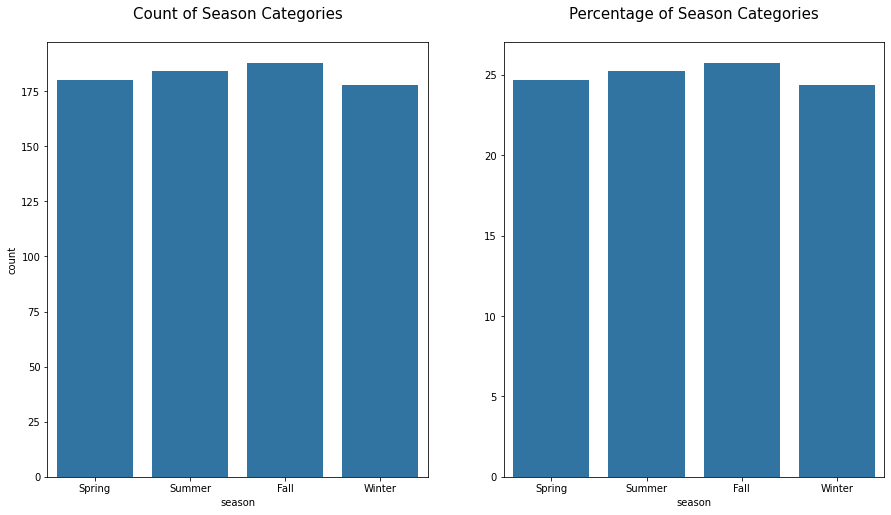

In [31]:
xticks = ['1', '2', '3', '4'], ['Spring', 'Summer', 'Fall', 'Winter'], 0
fig,ax = plot_countplot('season', 'Season', xticks, figsize=(15, 8))

#### Inference:
             1) The counts of each season category is almost equal

            cnt           
            sum     median
season                    
1        469514 2222.50000
2        918589 4941.50000
3       1061129 5353.50000
4        841613 4634.50000


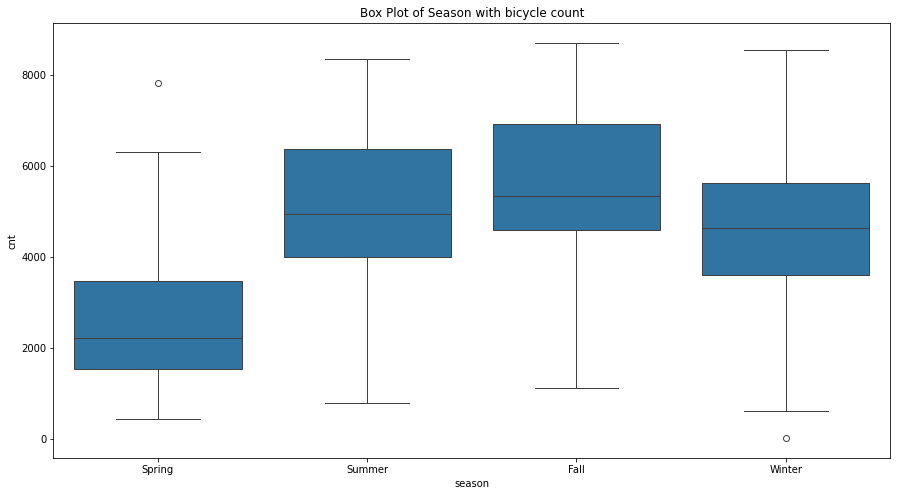

In [32]:
plot_cat_with_target(col='season', col_desc='Season', xticks=xticks, figsize=(15,8))

#### Inference:
             1) The demand for bicycles is highest in fall followed by summer and least in spring
             2) The total count and median count of bicycle in fall season is 1061129 and 5353
             3) The total count and median count of bicycle in summer season is 918589 and 4941
             4) The total count and median count of bicycle in spring season is 469514 and 2222

### Year

yr
0    365
1    365
Name: count, dtype: int64 

 yr
0   50.00000
1   50.00000
Name: proportion, dtype: float64


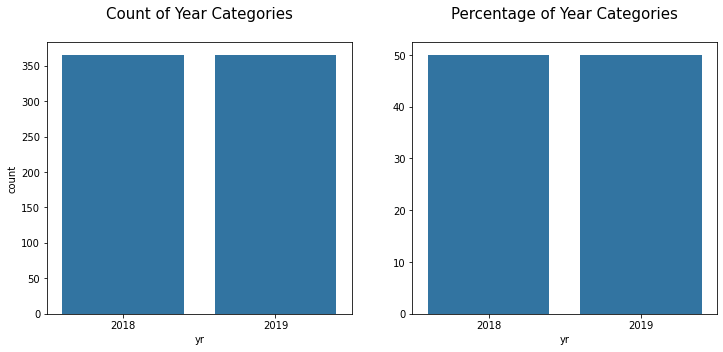

In [33]:
xticks = ['0', '1'], ['2018', '2019'], 0
fig,ax = plot_countplot('yr', 'Year', xticks, figsize=(12, 5))

#### Inference: The counts of each year is almost equal

        cnt           
        sum     median
yr                    
0   1243103 3740.00000
1   2047742 5936.00000


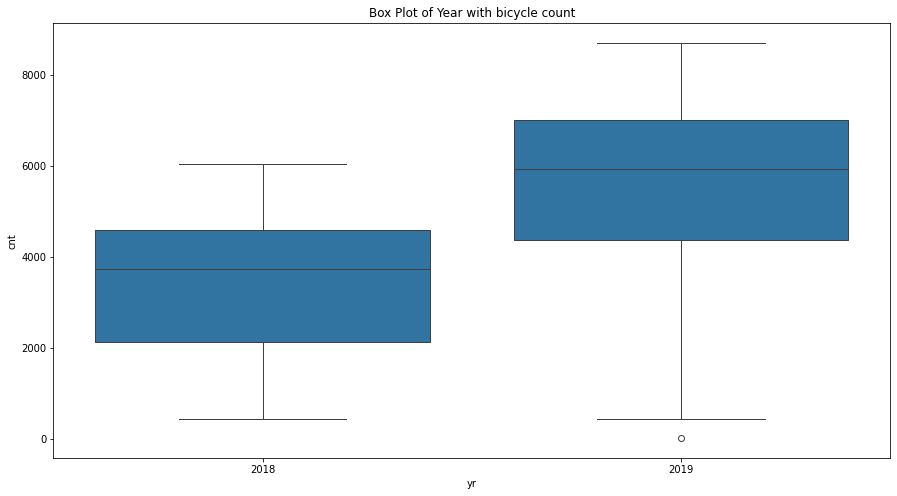

In [34]:
plot_cat_with_target(col='yr', col_desc='Year', xticks= xticks, figsize=(15,8))

#### Inference:
             1) The demand for bicycles is higher in 2019 than 2018
             2) The total count and median count of bicycle in 2018 is 1243103 and 3740
             3) The total count and median count of bicycle in 2018 is 2047742 and 5936
             4) Bicycle demand has increased by almost 65% in 2019 as compared to 2018

### Month

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 

 mnth
1    8.49315
3    8.49315
5    8.49315
7    8.49315
8    8.49315
10   8.49315
12   8.49315
4    8.21918
6    8.21918
9    8.21918
11   8.21918
2    7.67123
Name: proportion, dtype: float64


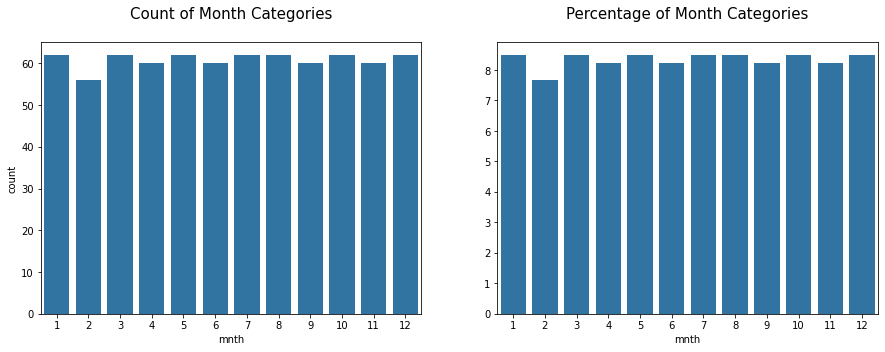

In [35]:
fig,ax = plot_countplot('mnth','Month', xticks= None, figsize=(15, 5))

#### Inference:
             1) Month variable has a almost uniform distribution 

         cnt           
         sum     median
mnth                   
1     134933 1939.00000
2     149518 2438.50000
3     228920 3216.50000
4     269094 4293.50000
5     331686 4890.50000
6     346342 5308.50000
7     344948 5446.50000
8     351194 5229.50000
9     345991 5384.00000
10    322352 5013.00000
11    254831 4081.00000
12    211036 3444.00000


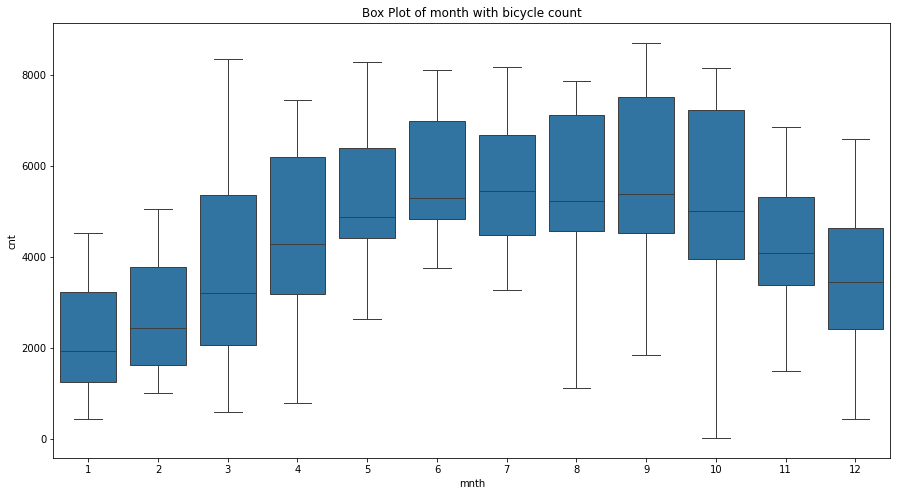

In [36]:
plot_cat_with_target(col='mnth', col_desc='month', xticks=None, figsize=(15,8))

In [37]:
df.groupby('mnth').apply(lambda x:np.percentile(x['cnt'], 75) - np.percentile(x['cnt'], 25)).sort_values(ascending=False)

mnth
3    3284.00000
10   3271.50000
4    3017.00000
9    2977.25000
8    2538.50000
12   2208.00000
7    2187.25000
2    2160.25000
6    2148.50000
5    1996.50000
1    1984.00000
11   1931.00000
dtype: float64

#### Inference:
             1) The demand for bicycles increases constantly from January till September 
                and then gradually decreases till December  
             2) The bicycle demand is more in April till December as compared to months from January to March.
             3) The demand is highest in months of June till September

### Holiday

holiday
0    709
1     21
Name: count, dtype: int64 

 holiday
0   97.12329
1    2.87671
Name: proportion, dtype: float64


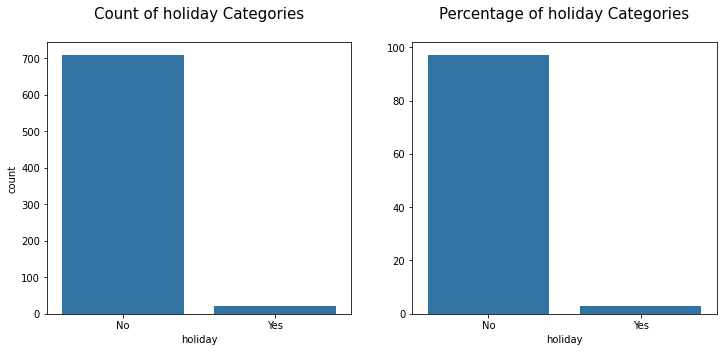

In [38]:
xticks = ['0', '1'], ['No', 'Yes'], 0
fig,ax = plot_countplot('holiday', 'holiday', xticks = xticks, figsize=(12, 5))

#### Inference:
             1) The counts of no holiday days are much more than yes ones

             cnt           
             sum     median
holiday                    
0        3212410 4563.00000
1          78435 3351.00000


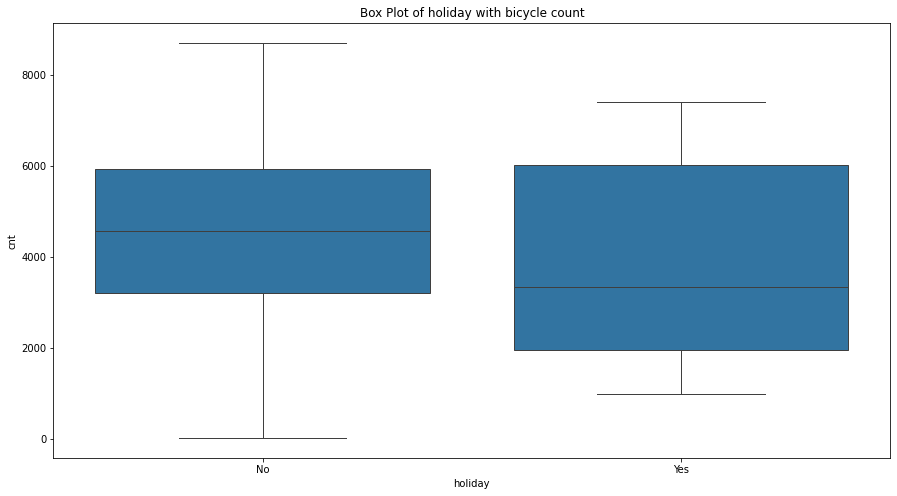

In [39]:
plot_cat_with_target(col='holiday', col_desc='holiday', xticks=xticks, figsize=(15,8))

#### Inference:
             1) The median demand is much higher on no holiday days(4563) as compared to holiday ones(3351).

### Weekday

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 

 weekday
6   14.38356
0   14.38356
1   14.38356
2   14.24658
4   14.24658
5   14.24658
3   14.10959
Name: proportion, dtype: float64


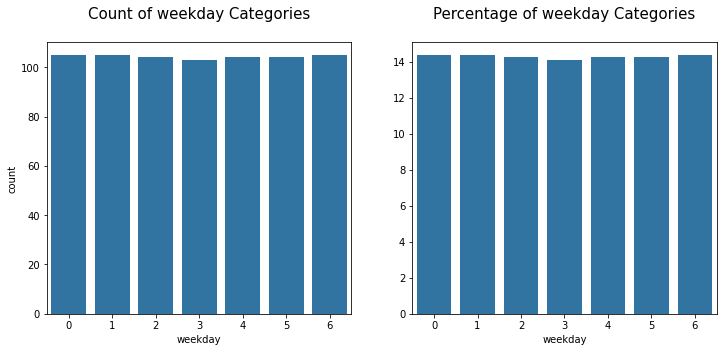

In [40]:
fig,ax = plot_countplot('weekday', 'weekday', xticks=None, figsize=(12, 5))

#### Inference:
             1) Weekday variable has a almost uniform distribution 

            cnt           
            sum     median
weekday                   
0        444027 4334.00000
1        455503 4359.00000
2        469109 4576.50000
3        471214 4656.00000
4        485395 4721.00000
5        487790 4601.50000
6        477807 4521.00000


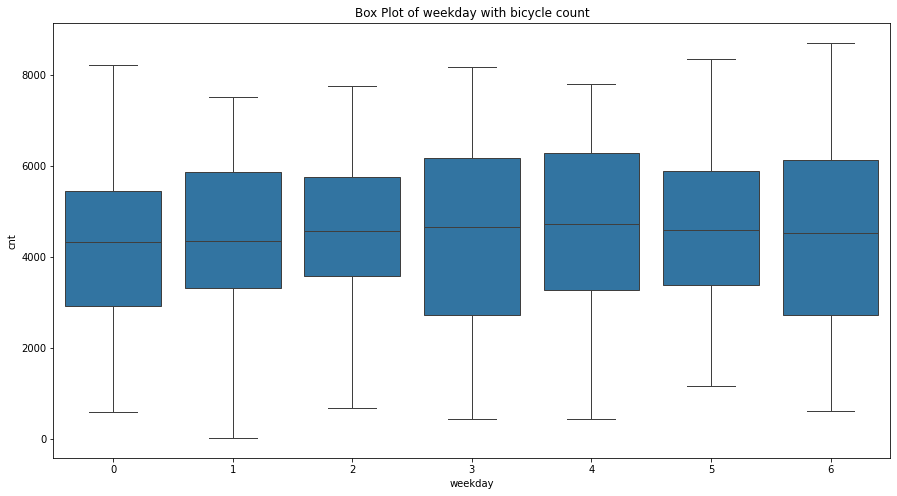

In [41]:
plot_cat_with_target(col='weekday', col_desc='weekday', xticks=None, figsize=(15,8))

#### Inference:
             1) All the weekday's have almost same amount of median demand of bicycles
             2) 25% of bicycle demand on each day very gradually increases as week progresses

### Working Day

workingday
1    499
0    231
Name: count, dtype: int64 

 workingday
1   68.35616
0   31.64384
Name: proportion, dtype: float64


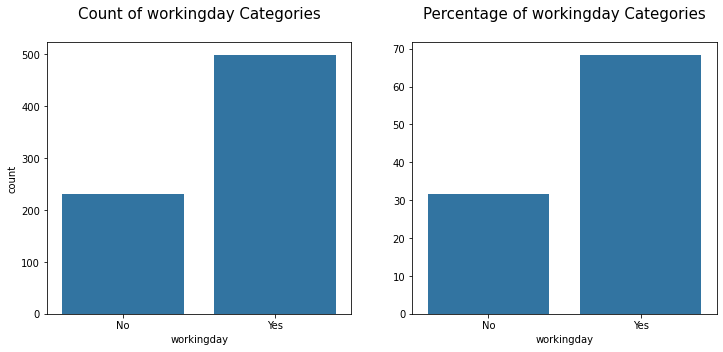

In [251]:
xticks = ['0', '1'], ['No', 'Yes'], 0
fig,ax = plot_countplot('workingday', 'workingday', xticks=xticks, figsize=(12, 5))

#### Inference:
             1) Working day datapoints(499) are more in number than non working day datapoints(231)

                cnt           
                sum     median
workingday                    
0           1000269 4459.00000
1           2290576 4585.00000


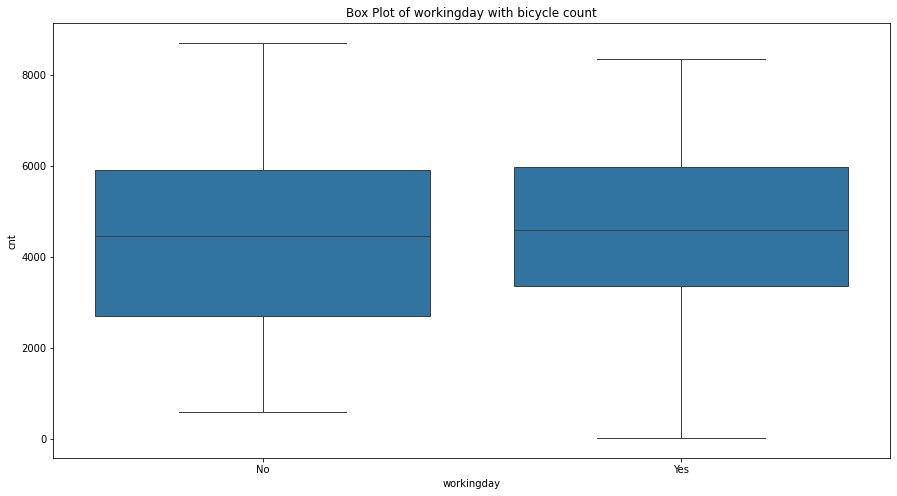

In [252]:
plot_cat_with_target(col='workingday', col_desc='workingday', xticks=xticks, figsize=(15,8))

#### Inference:
             1) The demand for bicycles is more on working days
             2) 25% of the bicycle demand on working days is more than the 25% on non-working days.

### Weather

weathersit
1    463
2    246
3     21
Name: count, dtype: int64 

 weathersit
1   63.42466
2   33.69863
3    2.87671
Name: proportion, dtype: float64


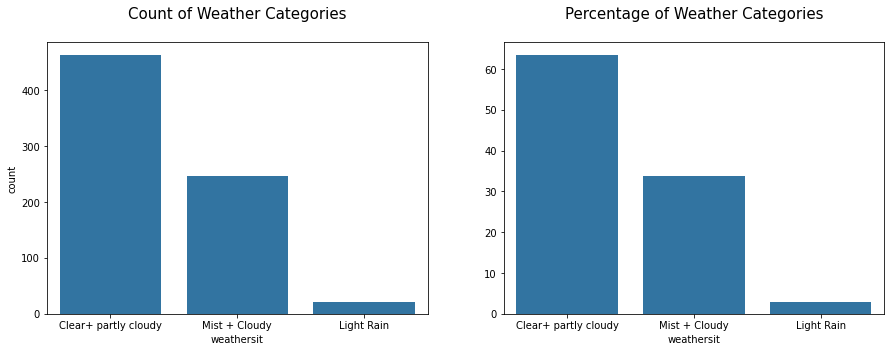

In [44]:
xticks = ['1', '2', '3'], ['Clear+ partly cloudy', 'Mist + Cloudy', 'Light Rain'], 0
fig,ax = plot_countplot('weathersit', 'Weather', xticks=xticks, figsize=(15, 5))

#### Inference:
             1) The counts of clear/partly cloudy and mist/cloudy data points is much more than light rain datapoints.

                cnt           
                sum     median
weathersit                    
1           2257952 4844.00000
2            995024 4043.00000
3             37869 1817.00000


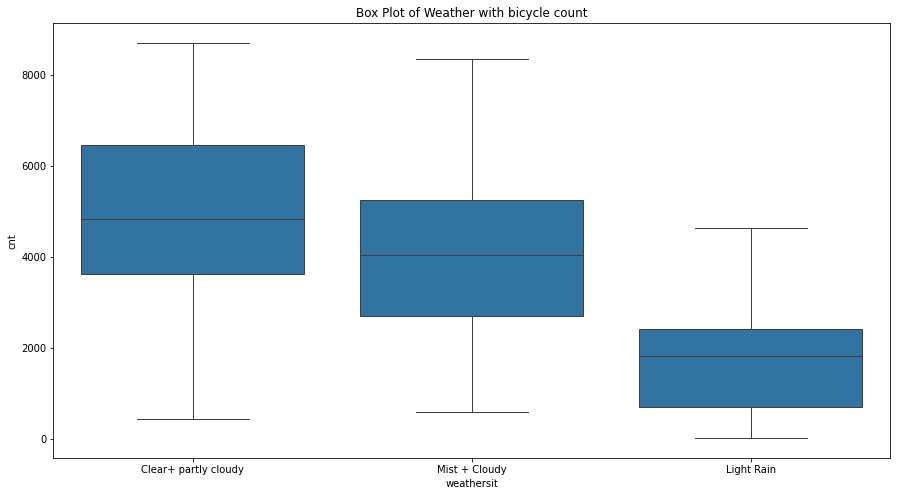

In [45]:
plot_cat_with_target(col='weathersit', col_desc='Weather', xticks=xticks, figsize=(15,8))

#### Inference:
             1) The demand for bicycle is maximum on clear/partly cloudy days followerd by mist/cloudy days and
                least on light rain days.

## Mutlivariate Analysis

### Temperature + yr with Bicycle Count

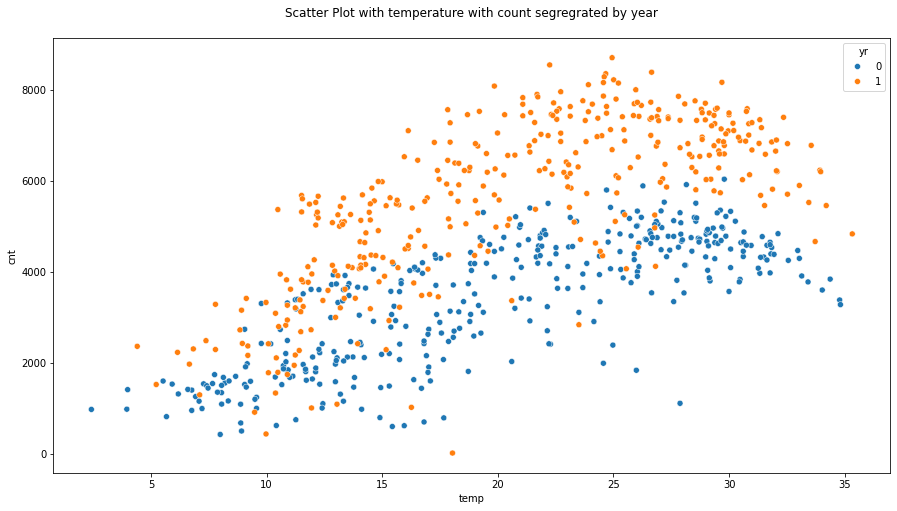

In [238]:
plt.figure(figsize=(15,8))
sns.scatterplot(x='temp', y='cnt', hue='yr', data=df)
plt.title('Scatter Plot with temperature with count segregrated by year\n')
plt.show()

#### Inference:
             1) The demand for bicycle is increasing with year and with increasing temperature
             2) In general, the demand at the same temperature is more in 2019 than 2018. 

### Year  + Temperature + Working Day with Bicycle count

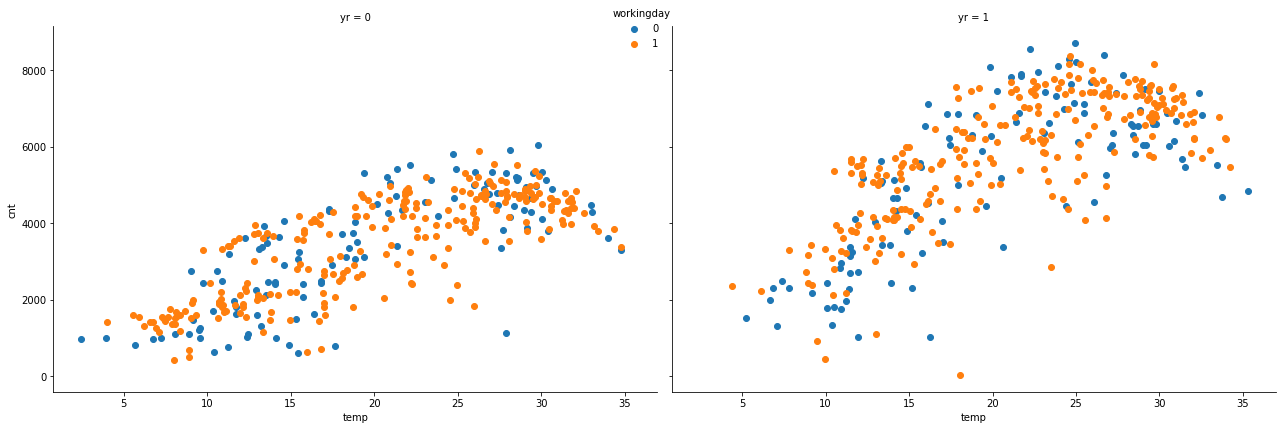

In [259]:
g = sns.FacetGrid(df, col="yr",hue ='workingday', height=6, aspect=1.5)
g.map(plt.scatter, 'temp', 'cnt')
g.add_legend(loc='upper center')
plt.show()

#### Inference:
             1) The demand is low when the temperature is low irrespective of whether the day is working or not.
             2) The demand is high when the temperature is low irrespective of whether the day is working or not.

#### Year +  Windspeed + Working Day with Bicycle Count

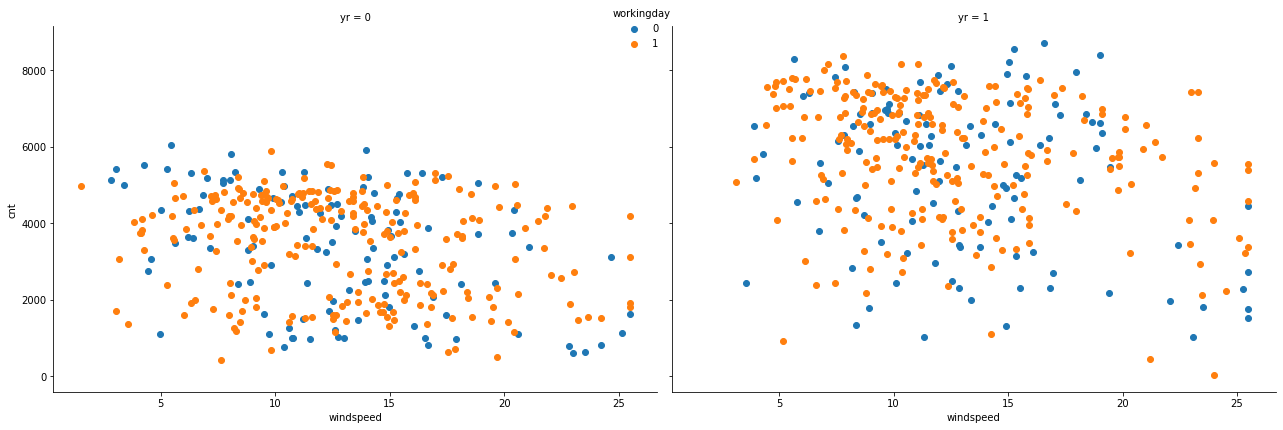

In [262]:
g = sns.FacetGrid(df, col="yr",hue ='workingday', height=6, aspect=1.5)
g.map(plt.scatter, 'windspeed', 'cnt')
g.add_legend(loc='upper center')
plt.show()

#### Inference:
              1) When the windspeed is low(>18) the demand is good irrespective of working day or no working day.
              2) The demand generally decreases when windspeed is greater than 18
              3) When the windspeed is high(>18) and when it is a working day the demand is still high than 
                 at the same speed on non- working days

#### Year + Season with Bicycle Count

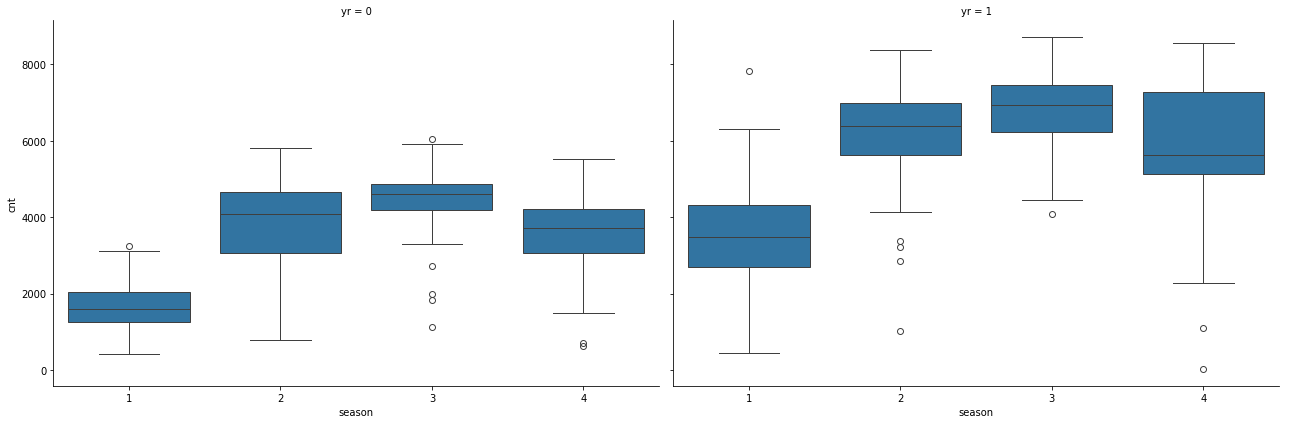

In [49]:
g = sns.FacetGrid(df, col="yr", height=6, aspect=1.5)
g.map(sns.boxplot, "season", "cnt")
g.add_legend()
plt.show()

#### Inference:
             1) The demand for bicycle is increasing with year and with increasing temperature
             2) In general, the demand in the same season is more in 2019 than 2018. 

#### Month + Season with Bicycle Count

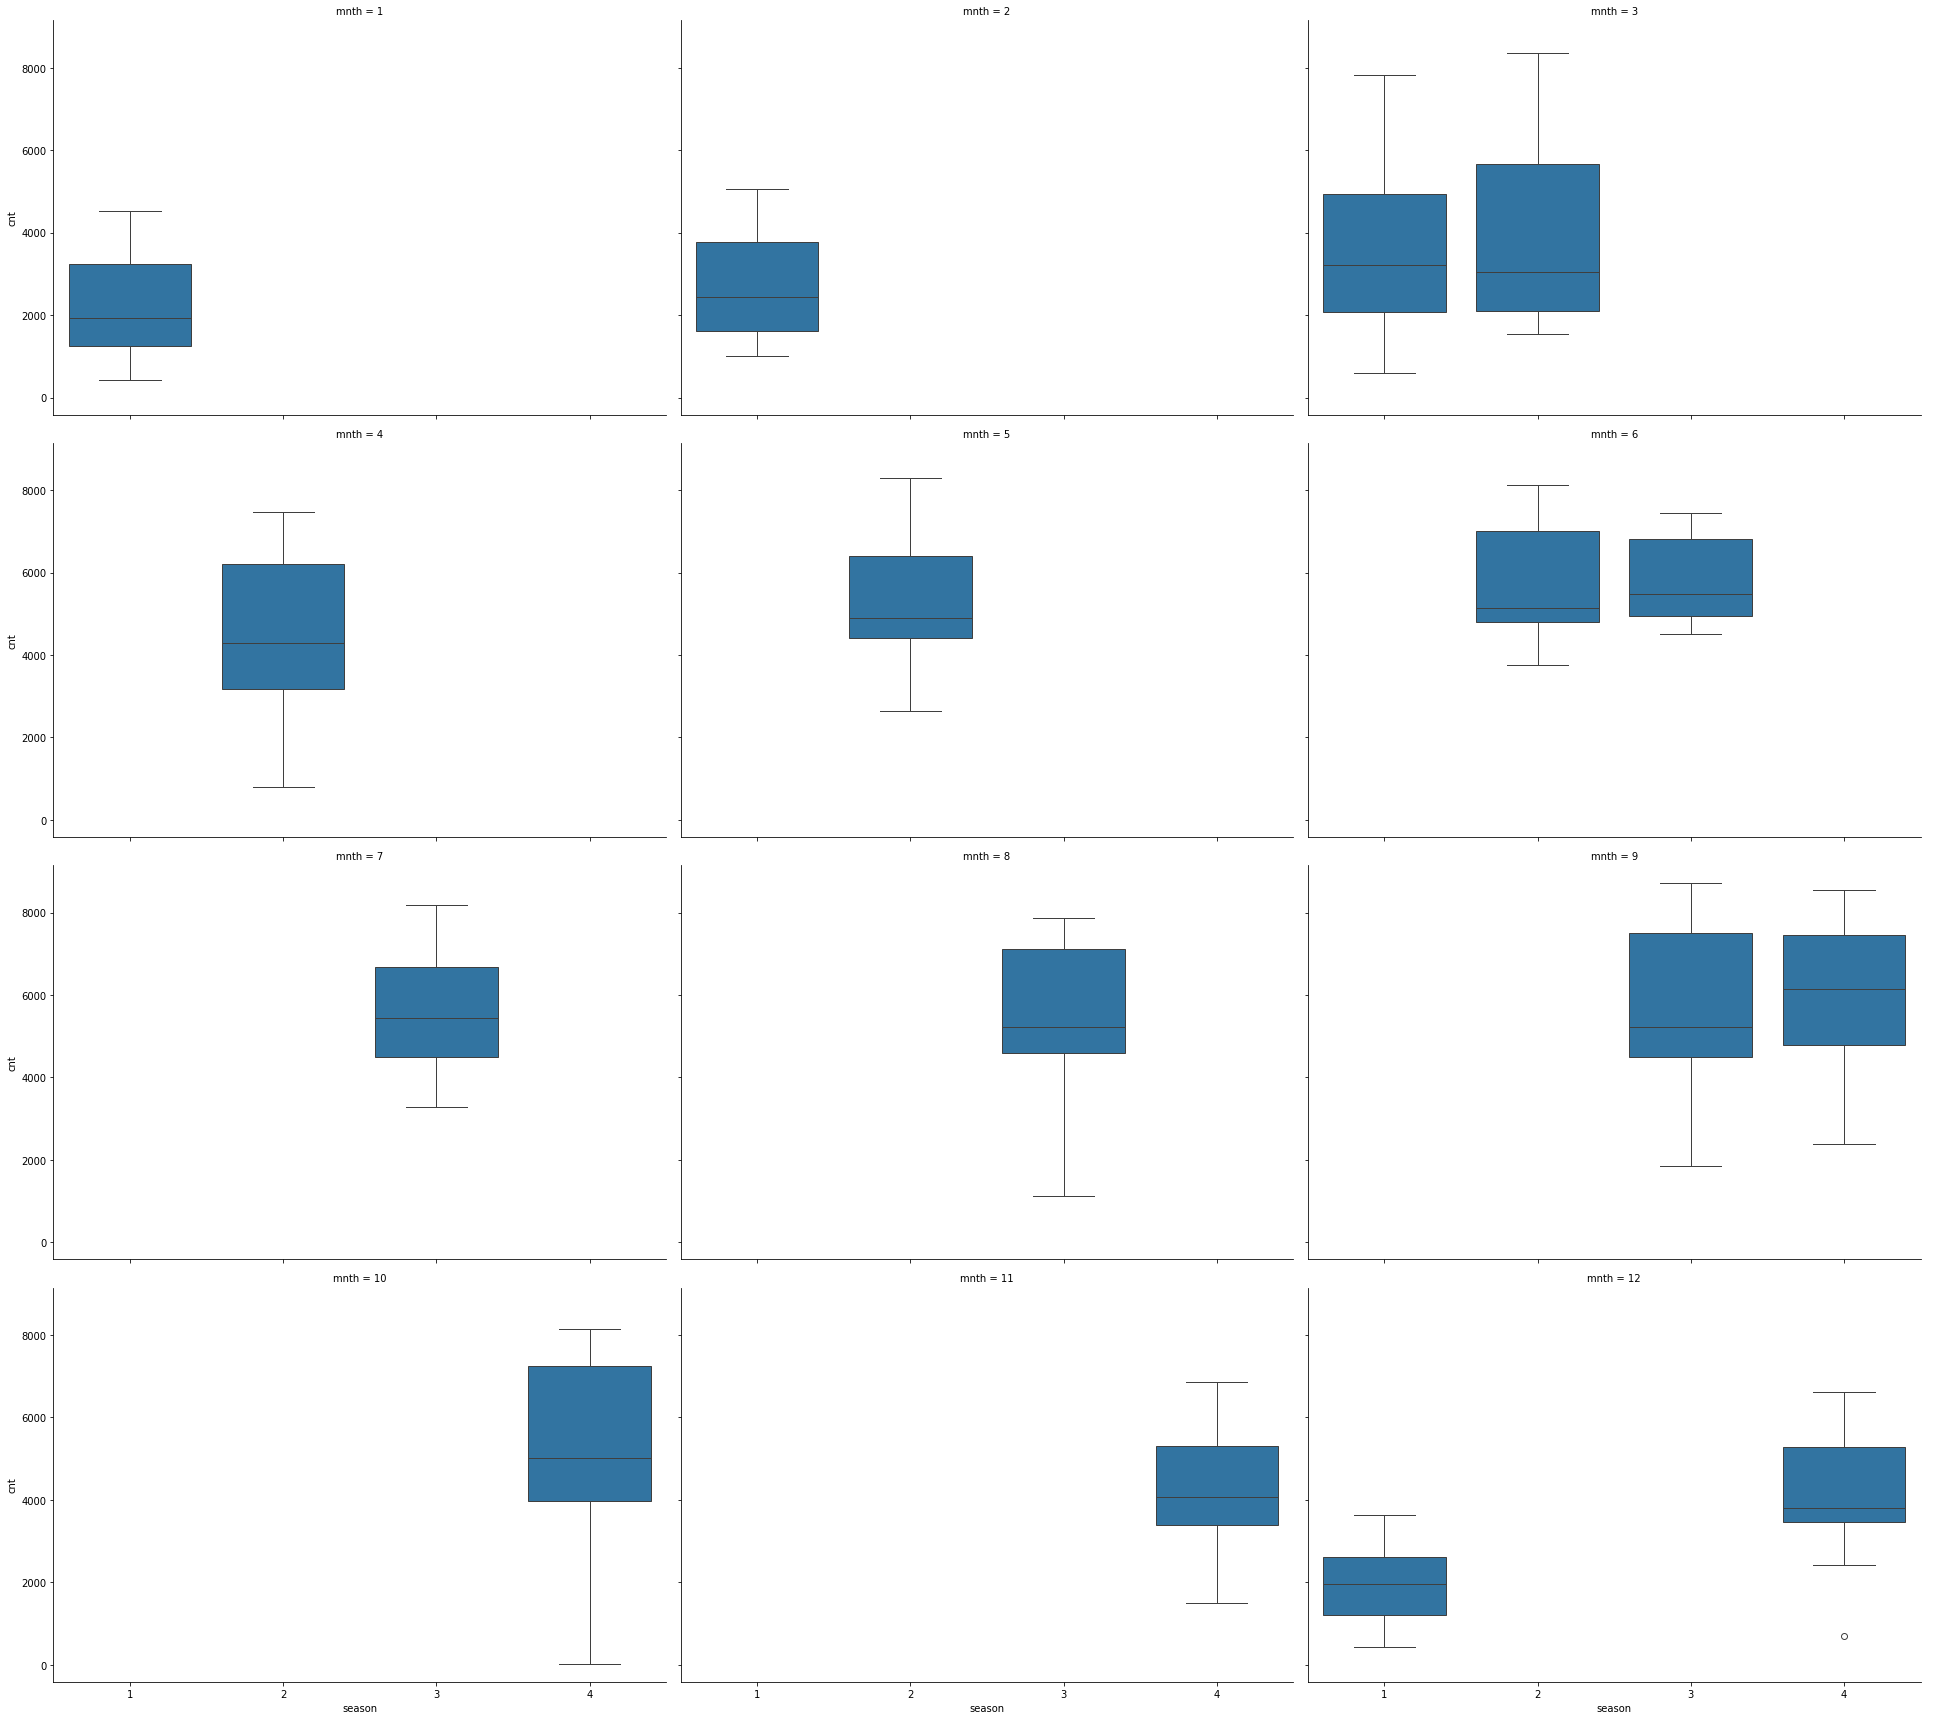

In [267]:
g = sns.FacetGrid(df, col="mnth", col_wrap=3, height=6, aspect=1.5)
g.map(sns.boxplot, "season", "cnt")
g.add_legend()
plt.show()

# Statistical Analysis

## Multicollinearity

#### Standarizing the continuous variables and converting the discrete into dummy

In [51]:
vif_sc = StandardScaler()

In [52]:
df_2 = df.copy()

In [54]:
df_2[['temp', 'hum', 'windspeed']] = vif_sc.fit_transform(df_2[['temp', 'hum', 'windspeed']])

In [55]:
df_2.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,-0.82761,1.26006,-0.38886,985
1,1,0,1,0,0,0,2,-0.72207,0.48263,0.77573,801
2,1,0,1,0,1,1,1,-1.63543,-1.35078,0.77269,1349
3,1,0,1,0,2,1,1,-1.61556,-0.26580,-0.39084,1562
4,1,0,1,0,3,1,1,-1.46823,-1.35302,-0.03914,1600


In [56]:
df_2_temp = pd.get_dummies(data=df_2, columns=['season', 'mnth', 'weekday'], dtype='int', drop_first=True)
df_2_temp.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,0,2,-0.82761,1.26006,-0.38886,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,2,-0.72207,0.48263,0.77573,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,-1.63543,-1.35078,0.77269,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,1,-1.61556,-0.26580,-0.39084,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,-1.46823,-1.35302,-0.03914,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [57]:
df_2 = pd.concat([df_2_temp , pd.get_dummies(data= df_2[['weathersit']], columns=['weathersit'], dtype='int')\
           .drop('weathersit_3', axis=1)], axis=1)

In [58]:
df_2.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2
0,0,0,0,2,-0.82761,1.26006,-0.38886,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,0,2,-0.72207,0.48263,0.77573,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,1,-1.63543,-1.35078,0.77269,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,1,1,-1.61556,-0.26580,-0.39084,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,1,-1.46823,-1.35302,-0.03914,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [60]:
df_2 = df_2.drop(['workingday', 'weathersit', 'cnt'], axis=1)
df_2.head()

,yr,holiday,temp,hum,windspeed,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2
0,0,0,-0.82761,1.26006,-0.38886,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
1,0,0,-0.72207,0.48263,0.77573,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,-1.63543,-1.35078,0.77269,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,0,0,-1.61556,-0.26580,-0.39084,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,-1.46823,-1.35302,-0.03914,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [61]:
ind_var = df_2.columns.tolist()

In [62]:
def calculate_vif(ind_var, vif):
    for var, idx in zip(ind_var, range(len(df_2[ind_var]))):  
        var_vif = variance_inflation_factor(df_2[ind_var].values, idx)
        vif[var] = var_vif
    return vif

In [63]:
vif = calculate_vif(ind_var, vif={})
pd.Series(vif).sort_values(ascending=False)

season_3       14.34433
weathersit_1   12.48646
season_2       10.00696
season_4        9.83041
mnth_7          8.51550
mnth_8          8.15294
weathersit_2    6.73155
mnth_6          6.49240
mnth_5          6.43285
mnth_9          6.11672
mnth_4          5.47838
mnth_10         5.40242
temp            5.09442
mnth_11         5.07956
mnth_12         3.22377
mnth_3          2.36445
yr              2.03433
weekday_1       2.01641
weekday_5       1.91070
weekday_6       1.88962
hum             1.88025
weekday_4       1.87026
weekday_2       1.86615
weekday_3       1.83373
mnth_2          1.73276
windspeed       1.17369
holiday         1.14940
dtype: float64

#### Inference: Removing season 3 as its VIF > 5 and recalculating it

In [64]:
ind_var.remove('season_3')

In [65]:
vif = calculate_vif(ind_var, vif={})
pd.Series(vif).sort_values(ascending=False)

weathersit_1   12.47568
season_4        6.99291
season_2        6.77442
weathersit_2    6.72923
mnth_5          5.54691
temp            5.04894
mnth_6          4.88135
mnth_10         4.53492
mnth_4          4.52001
mnth_7          4.43677
mnth_11         4.16372
mnth_8          4.02159
mnth_9          3.15305
mnth_12         2.82145
mnth_3          2.24545
yr              2.03433
weekday_1       2.01393
weekday_5       1.91003
weekday_6       1.88717
hum             1.87965
weekday_4       1.86513
weekday_2       1.86287
weekday_3       1.83092
mnth_2          1.73271
windspeed       1.17308
holiday         1.14879
dtype: float64

#### Inference: Removing weathersit 1 as its VIF > 5 and recalculating it

In [66]:
ind_var.remove('weathersit_1')

In [67]:
# sc
vif = calculate_vif(ind_var, vif={})
pd.Series(vif).sort_values(ascending=False)

season_4       6.98619
season_2       6.76019
mnth_5         4.06352
temp           3.90615
mnth_10        3.88121
mnth_11        3.78050
mnth_4         3.69225
mnth_6         3.24925
mnth_7         2.53738
mnth_12        2.50129
mnth_8         2.28418
weathersit_2   2.16315
yr             1.95717
mnth_9         1.93657
weekday_1      1.90283
weekday_6      1.80530
weekday_5      1.80456
weekday_4      1.76257
weekday_2      1.75443
weekday_3      1.74789
hum            1.73624
mnth_3         1.70890
mnth_2         1.45307
windspeed      1.15268
holiday        1.14472
dtype: float64

#### Inference: Removing season 4 as its VIF > 5 and recalculating it

In [68]:
ind_var.remove('season_4')

In [69]:
vif = calculate_vif(ind_var, vif={})
pd.Series(vif).sort_values(ascending=False)

season_2       6.76015
mnth_5         4.06352
temp           3.90564
mnth_4         3.69182
mnth_6         3.24914
mnth_7         2.53707
mnth_8         2.28383
weathersit_2   2.16240
yr             1.95717
weekday_1      1.90217
weekday_6      1.80500
weekday_5      1.80450
mnth_9         1.77862
weekday_4      1.76255
weekday_2      1.75429
weekday_3      1.74782
hum            1.73608
mnth_3         1.70878
mnth_12        1.48721
mnth_10        1.46513
mnth_2         1.45287
mnth_11        1.39978
windspeed      1.14219
holiday        1.13690
dtype: float64

#### Inference: Removing season 2 as its VIF > 5 and recalculating it

In [70]:
ind_var.remove('season_2')

In [71]:
vif = calculate_vif(ind_var, vif={})
pd.Series(vif).sort_values(ascending=False)

temp           3.88793
mnth_7         2.53216
mnth_8         2.28102
weathersit_2   2.16194
mnth_6         2.15102
yr             1.95714
weekday_1      1.90206
weekday_6      1.80422
weekday_5      1.80385
mnth_9         1.77822
weekday_4      1.76180
weekday_2      1.75313
weekday_3      1.74774
hum            1.73047
mnth_5         1.72327
mnth_12        1.48606
mnth_10        1.46511
mnth_2         1.45249
mnth_4         1.44928
mnth_3         1.42727
mnth_11        1.39955
windspeed      1.14197
holiday        1.13690
dtype: float64

#### Inference: The above set of independent features have no multicollinearity. 

## T-test / Welch-t test

In [72]:
df.groupby('yr')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
yr,,,,,,,,
0,365.00000,3405.76164,1378.75367,431.00000,2132.00000,3740.00000,4586.00000,6043.00000
1,365.00000,5610.25205,1780.18345,22.00000,4375.00000,5936.00000,7013.00000,8714.00000


In [73]:
df.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.00000,4330.16883,2052.14124,605.00000,2710.50000,4459.00000,5907.50000,8714.00000
1,499.00000,4590.33267,1876.24761,22.00000,3362.00000,4585.00000,5989.00000,8362.00000


In [74]:
df.groupby('holiday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
holiday,,,,,,,,
0,709.00000,4530.90268,1927.71680,22.00000,3214.00000,4563.00000,5936.00000,8714.00000
1,21.00000,3735.00000,2103.35066,1000.00000,1951.00000,3351.00000,6034.00000,7403.00000


#### Inference:
             1) All the categories within year, workingday and holiday have different standard deviation 
                with bicycle count, hence parametric t-test can't be used for significance check and 
                non-parametric test Welch-t test will be used

### Workingday with Count

In [370]:
group_1, group_2 = df[df['workingday']==0]['cnt'], df[df['workingday']==1]['cnt']
t_stat, p_value = t_test(group_1, group_2)

print(f"t-stat: {t_stat} and p-value: {p_value}\n")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups of workingday on relationship with bicycle count")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups of workingday on relationship with bicycle count")


t-stat: -1.6361086461224856 and p-value: 0.10257712470062438

Fail to reject the null hypothesis: There is no significant difference between the two groups of workingday on relationship with bicycle count


### Year with Count

In [371]:
group_1, group_2 = df[df['yr']==0]['cnt'], df[df['yr']==1]['cnt']
t_stat, p_value = t_test(group_1, group_2)

print(f"t-stat: {t_stat} and p-value: {p_value}\n")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups of year on relationship with bicycle count")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups of year on relationship with bicycle count")


t-stat: -18.70466926736073 and p-value: 2.1995675917185053e-63

Reject the null hypothesis: There is a significant difference between the two groups of year on relationship with bicycle count


### Holiday with Count

In [373]:
group_1, group_2 = df[df['holiday']==0]['cnt'], df[df['holiday']==1]['cnt']
t_stat, p_value = t_test(group_1, group_2)

print(f"t-stat: {t_stat} and p-value: {p_value}\n")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups of holiday on relationship with bicycle count")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups of holiday on relationship with bicycle count")


t-stat: 1.712858927823543 and p-value: 0.10146082929272363

Fail to reject the null hypothesis: There is no significant difference between the two groups of holiday on relationship with bicycle count


## Anova / Welch anova test

In [79]:
for i in ['season', 'mnth', 'weekday', 'weathersit']:
    print(df.groupby(i)['cnt'].describe(),'\n')

           count       mean        std        min        25%        50%        75%        max
season                                                                                       
1      180.00000 2608.41111 1402.65994  431.00000 1536.00000 2222.50000 3463.75000 7836.00000
2      184.00000 4992.33152 1695.97723  795.00000 4003.00000 4941.50000 6377.00000 8362.00000
3      188.00000 5644.30319 1459.80038 1115.00000 4586.50000 5353.50000 6929.25000 8714.00000
4      178.00000 4728.16292 1699.61526   22.00000 3615.50000 4634.50000 5624.50000 8555.00000 

        count       mean        std        min        25%        50%        75%        max
mnth                                                                                      
1    62.00000 2176.33871 1161.67437  431.00000 1251.75000 1939.00000 3235.75000 4521.00000
2    56.00000 2669.96429 1150.26485 1005.00000 1618.50000 2438.50000 3778.75000 5062.00000
3    62.00000 3692.25806 1899.30181  605.00000 2077.00000 3216.50000 5

#### Inference:
             1) All the categories within season, month, weekday, weathersit have different standard deviation 
                with bicyle count, hence parametric anova test can't be used and non-parametric test anova Welch
                test will be used

In [80]:
def anova(col):
    welch_anova_result = pg.welch_anova(dv='cnt', between=col, data=df)
    return welch_anova_result

### Season with Count

In [81]:
anova('season')

,Source,ddof1,ddof2,F,p-unc,np2
0,season,3,401.37138,152.58632,0.00000,0.34550


#### Inference: Since p-value is less than 0.05, so we reject the null hypothesis, thus there is a significant difference between the  groups of season with relationship with bicycle count

### Month with Count

In [82]:
anova('mnth')

,Source,ddof1,ddof2,F,p-unc,np2
0,mnth,11,282.47130,56.45287,0.00000,0.38931


#### Inference: Since p-value is less than 0.05, so we reject the null hypothesis, thus there is a significant difference between the  groups of month with respect to bicycle count

### Weekday with Count

In [83]:
anova('weekday')

,Source,ddof1,ddof2,F,p-unc,np2
0,weekday,6,321.16682,0.84162,0.53850,0.00657


#### Inference: Since p-value is greater than 0.05, so we fail to reject the null hypothesis, thus there is no significant difference between the groups of weekday with respect to bicycle count

### WeatherSit with Count

In [84]:
anova('weathersit')

,Source,ddof1,ddof2,F,p-unc,np2
0,weathersit,2,57.83547,64.92497,0.00000,0.09858


#### Inference: Since p-value is less than 0.05, so we reject the null hypothesis, thus there is a significant difference between the  groups of weathersit with respect to bicycle count

# Train Test Split

In [390]:
X_train, X_test = train_test_split(df, test_size=0.1, random_state=42)

# Model Training

## Season will be dropped as it multicolliear with other predictors

In [280]:
X_train.drop('season', axis=1, inplace=True)

## Standardizing the continuous variables

In [281]:
sc = StandardScaler()
sc.fit(X_train[['temp', 'hum', 'windspeed']])

StandardScaler()

In [282]:
X_train[['temp', 'hum', 'windspeed']] = sc.transform(X_train[['temp', 'hum', 'windspeed']])

## Converting the discrete variables into dummy format

In [283]:
X_train_temp = pd.get_dummies(data=X_train, columns=['mnth', 'weekday'], dtype='int', drop_first=True)

In [284]:
X_train = pd.concat([X_train_temp , pd.get_dummies(data= X_train[['weathersit']], columns=['weathersit'], dtype='int')\
           .drop('weathersit_3', axis=1)], axis=1)

In [286]:
X_train.head()

,yr,holiday,workingday,weathersit,temp,hum,windspeed,cnt,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2
97,0,0,1,2,-0.88803,1.46017,0.49743,1471,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
568,1,0,1,1,1.32981,0.44873,-0.67072,6966,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
409,1,0,1,2,-0.97910,-0.87118,-0.63771,3922,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
23,0,0,1,1,-2.19108,-0.99228,-0.41083,1416,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
223,0,0,1,1,1.14764,-1.53855,-0.84351,4905,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0


In [287]:
X_train.drop(['weathersit_1', 'weathersit'], axis=1, inplace=True)

In [289]:
X, y = X_train.drop('cnt', axis=1), X_train['cnt']

In [291]:
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()

In [165]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          2.16e-207
Time:                        20:37:32   Log-Likelihood:                -5372.1
No. Observations:                 657   AIC:                         1.079e+04
Df Residuals:                     633   BIC:                         1.090e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2375.4937    196.796     12.071      0.000    1989.042    2761.946
yr            1999.6290     70.111     28.521      0.000    1861.950    2137.308
holiday       -386.9354    187.262     -2.066      0.039    -754.666     -19.205
workingday     315.2920     79.437      3.969      0.000     159.301     471.283
temp           994.6177     88.262     11.269      0.000     821.297    1167.939
hum           -406.2610     44.537     -9.122      0.000    -493.719    -318.803
windspeed     -318.5034     36.553     -8.713      0.000    -390.283    -246.723
mnth_2          83.8008    170.759      0.491      0.624    -251.522     419.124
mnth_3         768.7049    186.679      4.118      0.000     402.120    1135.290
mnth_4        1123.2728    201.039      5.587      0.000     728.489    1518.056
mnth_5        1407.6535    233.276      6.034      0.000     949.564    1865.743
mnth_6         945.1834    270.682      3.492      0.001     413.640    1476.727
mnth_7         393.8666    295.999      1.331      0.184    -187.392     975.125
mnth_8         858.3595    278.188      3.086      0.002     312.077    1404.642
mnth_9        1663.2644    244.575      6.801      0.000    1182.988    2143.541
mnth_10       1837.7729    201.964      9.099      0.000    1441.172    2234.374
mnth_11       1315.6367    176.300      7.462      0.000     969.433    1661.841
mnth_12        812.7653    173.326      4.689      0.000     472.401    1153.129
weekday_1      -60.9656     84.661     -0.720      0.472    -227.216     105.285
weekday_2      -41.6194     93.795     -0.444      0.657    -225.807     142.568
weekday_3      -36.5228     93.100     -0.392      0.695    -219.345     146.300
weekday_4        4.3985     91.318      0.048      0.962    -174.925     183.722
weekday_5       63.0657     91.387      0.690      0.490    -116.394     242.525
weekday_6      365.1381    129.141      2.827      0.005     111.542     618.734
weathersit_2  -153.5929     85.935     -1.787      0.074    -322.345      15.159
==============================================================================
Omnibus:                      135.667   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.228
Skew:                          -1.072   Prob(JB):                     5.32e-72
Kurtosis:                       5.718   Cond. No.                     3.17e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.42e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Remvoing weekday_4 as its p-value>0.05 and rebuilding the model

In [166]:
X.drop('weekday_4', axis=1, inplace=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     113.9
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          2.16e-207
Time:                        20:37:32   Log-Likelihood:                -5372.1
No. Observations:                 657   AIC:                         1.079e+04
Df Residuals:                     633   BIC:                         1.090e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2375.4937    196.796     12.071      0.000    1989.042    2761.946
yr            1999.6290     70.111     28.521      0.000    1861.950    2137.308
holiday       -382.5369    241.961     -1.581      0.114    -857.680      92.606
workingday     319.6905    127.859      2.500      0.013      68.611     570.770
temp           994.6177     88.262     11.269      0.000     821.297    1167.939
hum           -406.2610     44.537     -9.122      0.000    -493.719    -318.803
windspeed     -318.5034     36.553     -8.713      0.000    -390.283    -246.723
mnth_2          83.8008    170.759      0.491      0.624    -251.522     419.124
mnth_3         768.7049    186.679      4.118      0.000     402.120    1135.290
mnth_4        1123.2728    201.039      5.587      0.000     728.489    1518.056
mnth_5        1407.6535    233.276      6.034      0.000     949.564    1865.743
mnth_6         945.1834    270.682      3.492      0.001     413.640    1476.727
mnth_7         393.8666    295.999      1.331      0.184    -187.392     975.125
mnth_8         858.3595    278.188      3.086      0.002     312.077    1404.642
mnth_9        1663.2644    244.575      6.801      0.000    1182.988    2143.541
mnth_10       1837.7729    201.964      9.099      0.000    1441.172    2234.374
mnth_11       1315.6367    176.300      7.462      0.000     969.433    1661.841
mnth_12        812.7653    173.326      4.689      0.000     472.401    1153.129
weekday_1      -65.3641    129.242     -0.506      0.613    -319.159     188.431
weekday_2      -46.0179    129.461     -0.355      0.722    -300.243     208.208
weekday_3      -40.9213    128.749     -0.318      0.751    -293.748     211.905
weekday_5       58.6672    127.048      0.462      0.644    -190.819     308.153
weekday_6      365.1381    129.141      2.827      0.005     111.542     618.734
weathersit_2  -153.5929     85.935     -1.787      0.074    -322.345      15.159
==============================================================================
Omnibus:                      135.667   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.228
Skew:                          -1.072   Prob(JB):                     5.32e-72
Kurtosis:                       5.718   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remvoing weekday_3 as its p-value>0.05 and rebuilding the model

In [167]:
X.drop('weekday_3', axis=1, inplace=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     119.2
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          2.06e-208
Time:                        20:37:33   Log-Likelihood:                -5372.2
No. Observations:                 657   AIC:                         1.079e+04
Df Residuals:                     634   BIC:                         1.089e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2375.7152    196.655     12.081      0.000    1989.541    2761.890
yr            1999.8208     70.059     28.545      0.000    1862.245    2137.397
holiday       -401.9412    233.966     -1.718      0.086    -861.383      57.501
workingday     299.5605    110.992      2.699      0.007      81.604     517.517
temp           995.0400     88.189     11.283      0.000     821.862    1168.218
hum           -407.5539     44.319     -9.196      0.000    -494.584    -320.524
windspeed     -318.4962     36.527     -8.719      0.000    -390.225    -246.767
mnth_2          82.5581    170.593      0.484      0.629    -252.438     417.554
mnth_3         769.0143    186.544      4.122      0.000     402.696    1135.333
mnth_4        1122.9753    200.894      5.590      0.000     728.477    1517.473
mnth_5        1406.6915    233.091      6.035      0.000     948.967    1864.416
mnth_6         943.2293    270.421      3.488      0.001     412.201    1474.258
mnth_7         392.0369    295.733      1.326      0.185    -188.698     972.772
mnth_8         856.8171    277.948      3.083      0.002     311.007    1402.627
mnth_9        1663.2596    244.402      6.805      0.000    1183.325    2143.194
mnth_10       1836.7776    201.797      9.102      0.000    1440.507    2233.049
mnth_11       1315.8726    176.174      7.469      0.000     969.918    1661.827
mnth_12        812.9979    173.202      4.694      0.000     472.879    1153.116
weekday_1      -45.3645    112.810     -0.402      0.688    -266.890     176.161
weekday_2      -25.8581    112.779     -0.229      0.819    -247.323     195.607
weekday_5       78.4376    110.700      0.709      0.479    -138.946     295.821
weekday_6      365.0712    129.049      2.829      0.005     111.656     618.486
weathersit_2  -152.2719     85.774     -1.775      0.076    -320.707      16.163
==============================================================================
Omnibus:                      135.247   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.979
Skew:                          -1.071   Prob(JB):                     1.64e-71
Kurtosis:                       5.706   Cond. No.                         27.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remvoing weekday_2 as its p-value>0.05 and rebuilding the model

In [168]:
X.drop('weekday_2', axis=1, inplace=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     125.1
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.87e-209
Time:                        20:37:33   Log-Likelihood:                -5372.2
No. Observations:                 657   AIC:                         1.079e+04
Df Residuals:                     635   BIC:                         1.089e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2376.0411    196.503     12.092      0.000    1990.166    2761.916
yr            1999.5908     70.000     28.566      0.000    1862.132    2137.050
holiday       -409.9279    231.186     -1.773      0.077    -863.909      44.053
workingday     291.1622    104.696      2.781      0.006      85.571     496.754
temp           995.3625     88.112     11.297      0.000     822.337    1168.389
hum           -407.9274     44.256     -9.217      0.000    -494.834    -321.021
windspeed     -318.7904     36.477     -8.739      0.000    -390.421    -247.159
mnth_2          82.1767    170.458      0.482      0.630    -252.552     416.906
mnth_3         769.6706    186.383      4.130      0.000     403.669    1135.672
mnth_4        1123.7171    200.718      5.598      0.000     729.566    1517.869
mnth_5        1406.1153    232.904      6.037      0.000     948.761    1863.470
mnth_6         942.7181    270.210      3.489      0.001     412.106    1473.330
mnth_7         391.3663    295.498      1.324      0.186    -188.905     971.638
mnth_8         857.0780    277.738      3.086      0.002     311.682    1402.474
mnth_9        1663.2544    244.219      6.810      0.000    1183.679    2142.829
mnth_10       1836.5119    201.643      9.108      0.000    1440.544    2232.479
mnth_11       1315.8705    176.042      7.475      0.000     970.175    1661.566
mnth_12        813.8237    173.035      4.703      0.000     474.034    1153.614
weekday_1      -37.0008    106.669     -0.347      0.729    -246.468     172.467
weekday_5       86.7875    104.460      0.831      0.406    -118.342     291.917
weekday_6      365.0454    128.953      2.831      0.005     111.820     618.270
weathersit_2  -152.8006     85.679     -1.783      0.075    -321.048      15.447
==============================================================================
Omnibus:                      135.219   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.884
Skew:                          -1.071   Prob(JB):                     1.72e-71
Kurtosis:                       5.705   Cond. No.                         27.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remvoing weekday_1 as its p-value>0.05 and rebuilding the model

In [169]:
X.drop('weekday_1', axis=1, inplace=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     131.5
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.70e-210
Time:                        20:37:33   Log-Likelihood:                -5372.3
No. Observations:                 657   AIC:                         1.079e+04
Df Residuals:                     636   BIC:                         1.088e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2377.6564    196.312     12.112      0.000    1992.158    2763.155
yr            1998.9763     69.929     28.586      0.000    1861.657    2136.296
holiday       -437.1197    217.339     -2.011      0.045    -863.909     -10.331
workingday     282.2350    101.413      2.783      0.006      83.090     481.380
temp           996.5717     87.982     11.327      0.000     823.801    1169.342
hum           -408.1936     44.219     -9.231      0.000    -495.027    -321.361
windspeed     -318.9200     36.450     -8.749      0.000    -390.497    -247.343
mnth_2          82.2007    170.340      0.483      0.630    -252.296     416.697
mnth_3         770.6955    186.230      4.138      0.000     404.995    1136.396
mnth_4        1121.8864    200.510      5.595      0.000     728.145    1515.628
mnth_5        1405.0466    232.722      6.037      0.000     948.050    1862.044
mnth_6         940.1185    269.919      3.483      0.001     410.079    1470.158
mnth_7         387.9955    295.134      1.315      0.189    -191.559     967.550
mnth_8         853.6332    277.369      3.078      0.002     308.964    1398.302
mnth_9        1662.5729    244.042      6.813      0.000    1183.346    2141.799
mnth_10       1835.6397    201.488      9.110      0.000    1439.978    2231.301
mnth_11       1317.1080    175.884      7.488      0.000     971.724    1662.492
mnth_12        813.3824    172.911      4.704      0.000     473.837    1152.927
weekday_5       95.9495    100.996      0.950      0.342    -102.377     294.276
weekday_6      365.0154    128.863      2.833      0.005     111.966     618.065
weathersit_2  -153.2619     85.609     -1.790      0.074    -321.372      14.849
==============================================================================
Omnibus:                      135.525   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.742
Skew:                          -1.070   Prob(JB):                     4.12e-72
Kurtosis:                       5.725   Cond. No.                         27.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remvoing month 2 as its p-value>0.05 and rebuilding the model

In [170]:
X.drop('mnth_2', axis=1, inplace=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     138.6
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.60e-211
Time:                        20:37:33   Log-Likelihood:                -5372.4
No. Observations:                 657   AIC:                         1.078e+04
Df Residuals:                     637   BIC:                         1.087e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2425.7486    169.033     14.351      0.000    2093.819    2757.678
yr            1998.5728     69.882     28.599      0.000    1861.346    2135.799
holiday       -439.4520    217.154     -2.024      0.043    -865.877     -13.027
workingday     282.1099    101.352      2.783      0.006      83.086     481.134
temp          1004.3244     86.451     11.617      0.000     834.562    1174.087
hum           -408.8746     44.170     -9.257      0.000    -495.611    -322.138
windspeed     -318.7082     36.426     -8.750      0.000    -390.237    -247.179
mnth_3         727.0887    162.740      4.468      0.000     407.518    1046.660
mnth_4        1075.3048    175.640      6.122      0.000     730.402    1420.207
mnth_5        1353.7309    206.882      6.543      0.000     947.478    1759.984
mnth_6         884.1824    243.616      3.629      0.000     405.795    1362.570
mnth_7         329.4058    268.842      1.225      0.221    -198.518     857.329
mnth_8         797.1792    251.339      3.172      0.002     303.626    1290.732
mnth_9        1610.2538    218.506      7.369      0.000    1181.175    2039.332
mnth_10       1788.6948    176.341     10.143      0.000    1442.415    2134.975
mnth_11       1274.9293    152.537      8.358      0.000     975.392    1574.466
mnth_12        773.3585    151.629      5.100      0.000     475.605    1071.112
weekday_5       96.1416    100.934      0.953      0.341    -102.063     294.346
weekday_6      364.8872    128.785      2.833      0.005     111.992     617.783
weathersit_2  -153.5252     85.556     -1.794      0.073    -321.531      14.480
==============================================================================
Omnibus:                      135.303   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              326.989
Skew:                          -1.070   Prob(JB):                     9.89e-72
Kurtosis:                       5.714   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remvoing weekday_5 as its p-value>0.05 and rebuilding the model

In [171]:
X.drop('weekday_5', axis=1, inplace=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     146.2
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          2.05e-212
Time:                        20:37:33   Log-Likelihood:                -5372.8
No. Observations:                 657   AIC:                         1.078e+04
Df Residuals:                     638   BIC:                         1.087e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2420.0172    168.914     14.327      0.000    2088.323    2751.711
yr            1997.8749     69.873     28.593      0.000    1860.666    2135.083
holiday       -430.3491    216.928     -1.984      0.048    -856.329      -4.369
workingday     301.8013     99.214      3.042      0.002     106.977     496.626
temp          1002.3498     86.420     11.599      0.000     832.649    1172.051
hum           -412.6535     43.988     -9.381      0.000    -499.033    -326.274
windspeed     -320.1485     36.392     -8.797      0.000    -391.610    -248.687
mnth_3         731.0404    162.675      4.494      0.000     411.597    1050.484
mnth_4        1079.8695    175.561      6.151      0.000     735.121    1424.618
mnth_5        1357.9686    206.819      6.566      0.000     951.840    1764.097
mnth_6         888.3740    243.558      3.647      0.000     410.101    1366.647
mnth_7         337.4044    268.691      1.256      0.210    -190.222     865.030
mnth_8         802.7302    251.253      3.195      0.001     309.347    1296.113
mnth_9        1618.0938    218.335      7.411      0.000    1189.352    2046.835
mnth_10       1791.2544    176.308     10.160      0.000    1445.041    2137.468
mnth_11       1279.6099    152.447      8.394      0.000     980.251    1578.969
mnth_12        773.0763    151.618      5.099      0.000     475.346    1070.807
weekday_6      364.6762    128.776      2.832      0.005     111.800     617.552
weathersit_2  -146.0932     85.193     -1.715      0.087    -313.386      21.199
==============================================================================
Omnibus:                      134.787   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              327.136
Skew:                          -1.065   Prob(JB):                     9.19e-72
Kurtosis:                       5.723   Cond. No.                         23.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remvoing weathersit_2 as its p-value>0.05 and rebuilding the model

In [172]:
X.drop('weathersit_2', axis=1, inplace=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     154.2
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          6.98e-213
Time:                        20:37:34   Log-Likelihood:                -5374.4
No. Observations:                 657   AIC:                         1.078e+04
Df Residuals:                     639   BIC:                         1.087e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2398.2992    168.694     14.217      0.000    2067.038    2729.561
yr          1986.0840     69.639     28.520      0.000    1849.335    2122.833
holiday     -439.4992    217.192     -2.024      0.043    -865.995     -13.003
workingday   292.1089     99.203      2.945      0.003      97.306     486.912
temp        1024.4379     85.584     11.970      0.000     856.378    1192.498
hum         -451.1100     37.900    -11.903      0.000    -525.533    -376.687
windspeed   -324.9021     36.341     -8.940      0.000    -396.264    -253.540
mnth_3       710.1264    162.463      4.371      0.000     391.100    1029.153
mnth_4      1056.2858    175.288      6.026      0.000     712.077    1400.495
mnth_5      1336.0493    206.737      6.463      0.000     930.083    1742.015
mnth_6       851.8529    242.994      3.506      0.000     374.690    1329.015
mnth_7       305.8198    268.466      1.139      0.255    -221.362     833.002
mnth_8       768.1908    250.825      3.063      0.002     275.651    1260.731
mnth_9      1602.6143    218.479      7.335      0.000    1173.591    2031.638
mnth_10     1785.6309    176.545     10.114      0.000    1438.953    2132.309
mnth_11     1289.7894    152.563      8.454      0.000     990.204    1589.374
mnth_12      773.4367    151.848      5.093      0.000     475.255    1071.618
weekday_6    362.3656    128.964      2.810      0.005     109.121     615.611
==============================================================================
Omnibus:                      128.297   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.966
Skew:                          -1.041   Prob(JB):                     3.98e-64
Kurtosis:                       5.517   Cond. No.                         22.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remvoing month 7 as its p-value>0.05 and rebuilding the model

In [173]:
X.drop('mnth_7', axis=1, inplace=True)
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.02e-213
Time:                        20:37:34   Log-Likelihood:                -5375.0
No. Observations:                 657   AIC:                         1.078e+04
Df Residuals:                     640   BIC:                         1.086e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2539.7562    114.207     22.238      0.000    2315.490    2764.022
yr          1977.3167     69.229     28.562      0.000    1841.374    2113.260
holiday     -454.2993    216.853     -2.095      0.037    -880.129     -28.469
workingday   285.9038     99.076      2.886      0.004      91.350     480.457
temp        1106.6383     46.027     24.043      0.000    1016.256    1197.021
hum         -456.3197     37.632    -12.126      0.000    -530.216    -382.423
windspeed   -327.2645     36.290     -9.018      0.000    -398.527    -256.002
mnth_3       623.3426    143.527      4.343      0.000     341.502     905.183
mnth_4       938.5198    141.588      6.629      0.000     660.486    1216.554
mnth_5      1163.8511    141.062      8.251      0.000     886.851    1440.851
mnth_6       633.1409    148.973      4.250      0.000     340.605     925.677
mnth_8       542.0661    153.361      3.535      0.000     240.914     843.218
mnth_9      1418.3426    146.886      9.656      0.000    1129.906    1706.779
mnth_10     1658.7766    137.024     12.106      0.000    1389.705    1927.849
mnth_11     1215.0968    137.786      8.819      0.000     944.530    1485.663
mnth_12      720.1030    144.483      4.984      0.000     436.384    1003.822
weekday_6    361.8769    128.994      2.805      0.005     108.575     615.179
==============================================================================
Omnibus:                      121.344   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              264.645
Skew:                          -1.004   Prob(JB):                     3.41e-58
Kurtosis:                       5.373   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Linear Regression Assumptions Check

#### 1) Predictors should have a linear relationship: Verified this in EDA section of continuous variables

#### 2) No Multicollinearity among predictors: Removed multicollinearity in Statistical Analysis section

#### 3) Observations must be independent: All observations are independent or no autocorrelation is present as 
#### shown from Durbin-watson test in statsmodels results. The value of the test statistic is ~2 which shows no autocorrelation 

#### 4) Errors should have a normal distribution

In [308]:
errors = y - model.predict(X)

count     657.00000
mean        0.00000
std       865.22527
min     -4547.78112
25%      -392.69505
50%        93.64026
75%       567.25858
max      2302.38281
dtype: float64


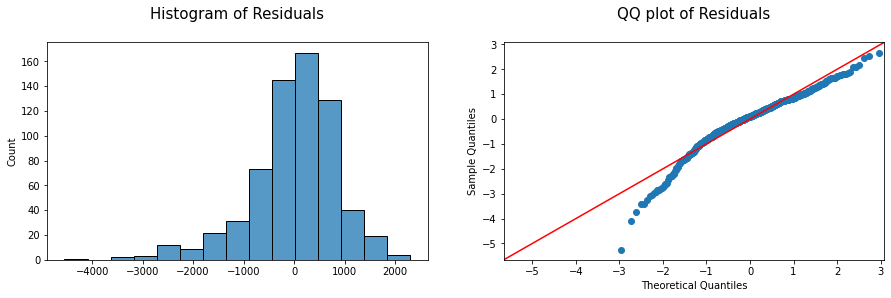

In [307]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(15, 4))

print(errors.describe())

sns.histplot(errors, bins=15, ax=ax[0])
    
ax[0].set_title(f"Histogram of Residuals\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})

sm.qqplot(errors, fit=True, line='45', ax=ax[1])

ax[1].set_title(f"QQ plot of Residuals\n", fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})

plt.show();

#### Inference:
              1) Residuals have a mean of zero as shown in histogram
              2) Residuals follow an approximate normal distribution as shown in QQ-plot

#### 5) Residuals should have a constant variance (Homoscedasticity Check)

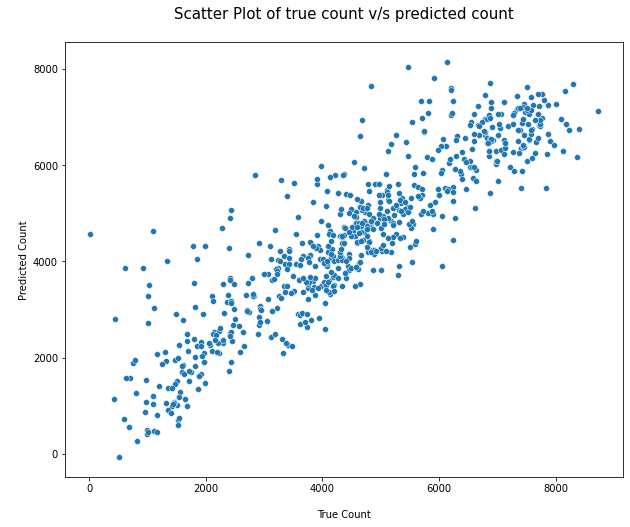

In [331]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x = y, y = model.predict(X))
plt.title('Scatter Plot of true count v/s predicted count\n', fontdict= {'fontsize':15 , 'fontweight':5, 'color':'Black'})
plt.xlabel('\nTrue Count', fontdict= {'fontsize':10 , 'fontweight':5, 'color':'Black'})
plt.ylabel('\nPredicted Count', fontdict= {'fontsize':10 , 'fontweight':5, 'color':'Black'})
plt.show();

#### Inference:
             1) Errors have a constant variance

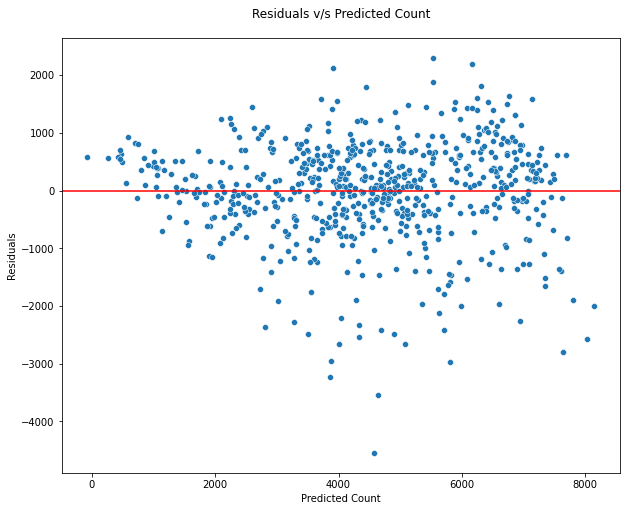

In [335]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=model.predict(X), y=errors)
plt.axhline(0, color='red', linestyle='-')
plt.title('Residuals v/s Predicted Count\n')
plt.xlabel('Predicted Count')
plt.ylabel('Residuals')
plt.show()

#### Inference:
            1) The spread of Residuals has no pattern

### Inference about Model:
                             1) All the assumptions of linear regression,i.e linear relationship of predictors
                                with target, no multicollinearity among predictors, residuals are normally distributed 
                                and residuals having constant variance are all satisfied
                             2) The model is statiscally significant as seen from the p-value of F-test.
                                It means atleast one of the predictor variables is statiscally significant in predicting
                                bicycle count
                             3) The final model has all predictors with p-value less than 0.05, thus all predictors of the
                                final model are statiscally significant in predicting bicycle count 
                             
                             

### Inference about Model Predictor Coefficients

In [388]:
model_pred_coeff = pd.DataFrame({'Predictor': model.params.index, 'Coefficient': model.params.values})
model_pred_coeff.sort_values(by= 'Coefficient', ascending = False)

,Predictor,Coefficient
0,const,2539.75617
1,yr,1977.31669
13,mnth_10,1658.77665
12,mnth_9,1418.34258
14,mnth_11,1215.09678
9,mnth_5,1163.85114
4,temp,1106.63833
8,mnth_4,938.51983
15,mnth_12,720.10296
10,mnth_6,633.14090


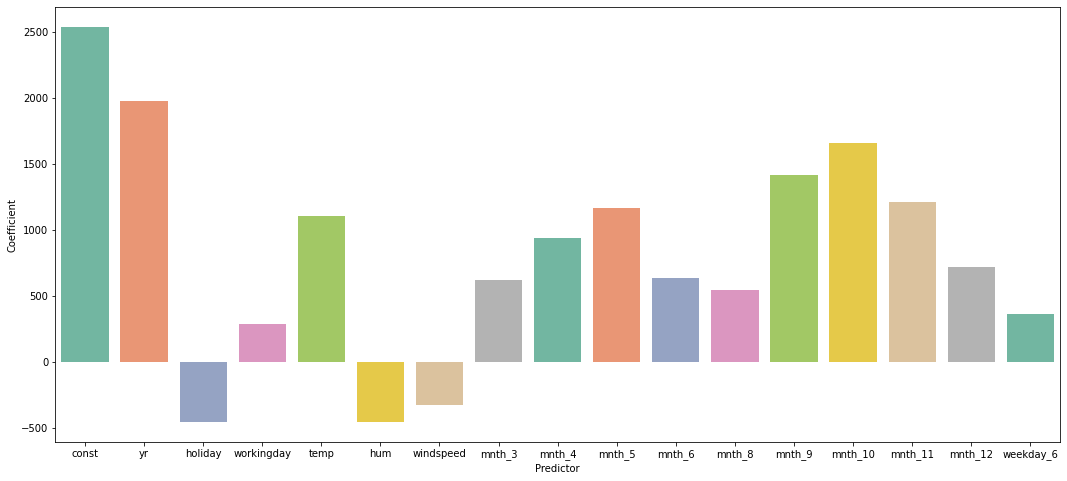

In [364]:
plt.figure(figsize=(18,8))
sns.barplot(model_pred_coeff, x='Predictor', y='Coefficient', palette='Set2')
plt.show();

#### Inference:
             1) The variables holiday, humidity, windspeed have negative coefficients,i.e when they increase 
                the demand of bicycle decreases
             2) Rest all variables have positive coefficients.

### Final Multiple Linear Equation with Coefficients

In [337]:
lr_equation= ''
for var , coeff in zip(model.params.index, model.params.values):
    lr_equation =  lr_equation + (f'({round(coeff, 2)} * {var}) + ')
    
print(lr_equation.strip('+ '))

(2539.76 * const) + (1977.32 * yr) + (-454.3 * holiday) + (285.9 * workingday) + (1106.64 * temp) + (-456.32 * hum) + (-327.26 * windspeed) + (623.34 * mnth_3) + (938.52 * mnth_4) + (1163.85 * mnth_5) + (633.14 * mnth_6) + (542.07 * mnth_8) + (1418.34 * mnth_9) + (1658.78 * mnth_10) + (1215.1 * mnth_11) + (720.1 * mnth_12) + (361.88 * weekday_6)


# Test Predictions

## Performing the same data preprocessing on test dataset as of training dataset

In [391]:
X_test.drop('season', axis=1, inplace=True)

In [392]:
X_test['hum'] = np.where(X_test['hum']<hum_lower_outlier_limit, hum_lower_outlier_limit, X_test['hum'])

X_test['windspeed'] = np.where(X_test['windspeed']>windspeed_upper_outlier_limit, windspeed_upper_outlier_limit,
                               X_test['windspeed'])

In [393]:
X_test[['temp', 'hum', 'windspeed']] = sc.transform(X_test[['temp', 'hum', 'windspeed']])

In [394]:
X_test_temp = pd.get_dummies(data=X_test, columns=['mnth', 'weekday'], dtype='int', drop_first=True)

In [395]:
X_test = pd.concat([X_test_temp , pd.get_dummies(data= X_test[['weathersit']], columns=['weathersit'], dtype='int')\
           .drop('weathersit_3', axis=1)], axis=1)

In [396]:
X_test.drop(['weathersit_1', 'weathersit', 'weekday_4', 'weekday_3', 'weekday_2', 'weekday_1',
             'mnth_2', 'weekday_5', 'weathersit_2', 'mnth_7'], axis=1, inplace=True)

In [397]:
X, y = X_test.drop('cnt', axis=1), X_test['cnt']

In [398]:
X = sm.add_constant(X) 

## R2 score on test dataset

In [399]:
r2_test = r2_score(y, model.predict(X))
r2_test

0.8244875770522215

## Mean Absolute error on test dataset

In [402]:
np.mean(y-  model.predict(X))

79.78143607972994

### Inference:
              1) The Training R2 score was ~80% and of test is ~82%, so the model is not overfitting and
                 generalizing well.

# Final Recommendations

## Top 5 variables which increase bicycle demand, higher the value of coefficient more they increase the demand

In [384]:
model_pred_coeff.sort_values(by= 'Coefficient', ascending=False).drop(0, axis=0).head().reset_index(drop=True)

,Predictor,Coefficient
0,yr,1977.31669
1,mnth_10,1658.77665
2,mnth_9,1418.34258
3,mnth_11,1215.09678
4,mnth_5,1163.85114


### Top 3 variables which decrease bicycle demand, lower the value of coefficient more they decrease the demand

In [386]:
model_pred_coeff.sort_values(by= 'Coefficient', ascending=False).tail(3).reset_index(drop=True)

,Predictor,Coefficient
0,windspeed,-327.26445
1,holiday,-454.29925
2,hum,-456.31968
